# Aspect-Based Sentiment Analysis along with BERTopic modeling 4

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow.pyfunc

import sys
import os

# Get the current working directory (typically where the notebook is located or executed)
current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

from src.models.inference import BERTSentimentAnalysisStrategyPredict
from src.models.topic_modeling import BERTopicModelingStrategy, TopicModelingContext

C:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Advanced Sentiment Analysis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading data

In [2]:
data_path_prediction = '../data/processed/cleaned_and_preprocessed_reviews.csv'
prediction_dataset = pd.read_csv(data_path_prediction)
prediction_dataset        

,text,rating,date,location,review_length,word_count
0,delicious thai restaurant look fresh flavorful...,5,"Dec 4, 2024","Temecula, CA",198,33
1,come valentine food good order tomyum soup duc...,3,"Feb 15, 2025","Jacksonville, FL",485,82
2,unfortunately husband react msg ajinomoto flav...,1,"Oct 25, 2024","Kailua, HI",733,131
3,food deliciousthe drawback fact card accept pa...,4,"Jan 7, 2025","San Rafael, CA",165,26
4,great place thai food long know extremely busy...,4,"Feb 6, 2024","San Clemente, CA",345,69
...,...,...,...,...,...,...
179,come sydney place return restaurant nice ambie...,4,"Jan 13, 2017","Brampton, Canada",1284,238
180,local friend recommend pearl sydney definitely...,5,"Apr 16, 2019","San Jose, CA",261,42
181,ve die come bookmarke week note machine not wo...,4,"May 17, 2016","Winnipeg, Canada",1973,361
182,excellent thai restaurant city locate cbd popu...,4,"Jun 18, 2016","Sydney, Australia",217,40


### Predict data

In [3]:
# bert_strategy = BERTSentimentAnalysisStrategyPredict("../models/saved_models")
bert_strategy = BERTSentimentAnalysisStrategyPredict("../mlflow_cache")

In [4]:
aspects = ["food", "service", "restaurant", "delivery", "price"]

# Predict sentiment for each row and each aspect
for aspect in aspects:
    prediction_dataset[f"Sentiment_{aspect}"] = prediction_dataset["text"].apply(
        lambda sentence: bert_strategy.analyze_sentiment(aspect, sentence)["sentiment"]
    )

In [5]:
# Convert to long format for visualization
prediction_dataset_long = prediction_dataset.melt(id_vars=["text"],
                          value_vars=[f"Sentiment_{aspect}" for aspect in aspects],
                          var_name="Aspect",
                          value_name="Sentiment")

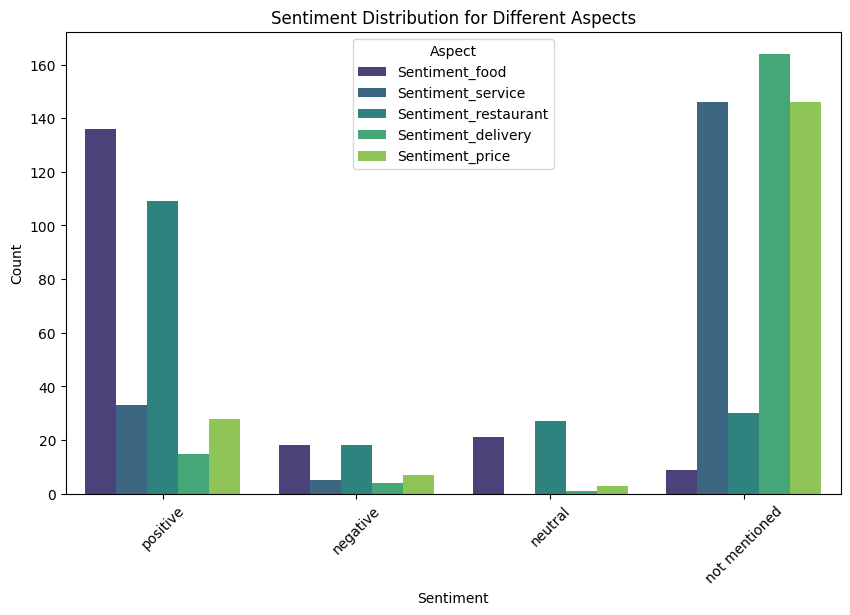

,text,rating,date,location,review_length,word_count,Sentiment_food,Sentiment_service,Sentiment_restaurant,Sentiment_delivery,Sentiment_price
0,delicious thai restaurant look fresh flavorful...,5,"Dec 4, 2024","Temecula, CA",198,33,positive,positive,positive,not mentioned,not mentioned
1,come valentine food good order tomyum soup duc...,3,"Feb 15, 2025","Jacksonville, FL",485,82,positive,not mentioned,positive,not mentioned,positive
2,unfortunately husband react msg ajinomoto flav...,1,"Oct 25, 2024","Kailua, HI",733,131,negative,not mentioned,negative,not mentioned,not mentioned
3,food deliciousthe drawback fact card accept pa...,4,"Jan 7, 2025","San Rafael, CA",165,26,positive,not mentioned,not mentioned,not mentioned,not mentioned
4,great place thai food long know extremely busy...,4,"Feb 6, 2024","San Clemente, CA",345,69,positive,not mentioned,positive,not mentioned,positive


In [6]:
# Visualization: Sentiment Distribution for all aspects
plt.figure(figsize=(10, 6))
sns.countplot(x="Sentiment", hue="Aspect", data=prediction_dataset_long, palette="viridis")
plt.title("Sentiment Distribution for Different Aspects")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title="Aspect")
plt.xticks(rotation=45)
plt.show()

# Display first few rows with predictions
prediction_dataset.head()

In [7]:
prediction_dataset

,text,rating,date,location,review_length,word_count,Sentiment_food,Sentiment_service,Sentiment_restaurant,Sentiment_delivery,Sentiment_price
0,delicious thai restaurant look fresh flavorful...,5,"Dec 4, 2024","Temecula, CA",198,33,positive,positive,positive,not mentioned,not mentioned
1,come valentine food good order tomyum soup duc...,3,"Feb 15, 2025","Jacksonville, FL",485,82,positive,not mentioned,positive,not mentioned,positive
2,unfortunately husband react msg ajinomoto flav...,1,"Oct 25, 2024","Kailua, HI",733,131,negative,not mentioned,negative,not mentioned,not mentioned
3,food deliciousthe drawback fact card accept pa...,4,"Jan 7, 2025","San Rafael, CA",165,26,positive,not mentioned,not mentioned,not mentioned,not mentioned
4,great place thai food long know extremely busy...,4,"Feb 6, 2024","San Clemente, CA",345,69,positive,not mentioned,positive,not mentioned,positive
...,...,...,...,...,...,...,...,...,...,...,...
179,come sydney place return restaurant nice ambie...,4,"Jan 13, 2017","Brampton, Canada",1284,238,neutral,not mentioned,neutral,not mentioned,not mentioned
180,local friend recommend pearl sydney definitely...,5,"Apr 16, 2019","San Jose, CA",261,42,positive,not mentioned,positive,not mentioned,not mentioned
181,ve die come bookmarke week note machine not wo...,4,"May 17, 2016","Winnipeg, Canada",1973,361,positive,not mentioned,not mentioned,not mentioned,not mentioned
182,excellent thai restaurant city locate cbd popu...,4,"Jun 18, 2016","Sydney, Australia",217,40,positive,not mentioned,positive,not mentioned,not mentioned


In [8]:
positive_delivery_reviews = prediction_dataset[prediction_dataset['Sentiment_delivery'] == 'positive']
positive_delivery_reviews

,text,rating,date,location,review_length,word_count,Sentiment_food,Sentiment_service,Sentiment_restaurant,Sentiment_delivery,Sentiment_price
16,place definitely live hype line stop service s...,5,"Jan 3, 2019","Los Angeles, CA",539,95,positive,positive,positive,positive,not mentioned
20,favorite thai place deliveryalway fast super r...,4,"Apr 15, 2018","Bayswater, Australia",123,20,not mentioned,not mentioned,not mentioned,positive,not mentioned
21,simply try crispy pork incredible try curry pu...,5,"Feb 6, 2018","Bridgeman Downs, Australia",595,109,positive,not mentioned,positive,positive,not mentioned
41,restaurant recommend friend wait 20 min happy ...,5,"Feb 25, 2018","Sunnyvale, CA",219,40,positive,positive,positive,positive,positive
42,delicious quick service delivery tom yum soup ...,5,"May 19, 2018","Houston, TX",245,43,positive,positive,positive,positive,not mentioned
55,excellent quick service meal delivery incredib...,5,"Sep 11, 2016","San Clemente, CA",191,33,positive,positive,positive,positive,not mentioned
64,delicious big menu decent price fast service f...,5,"Dec 24, 2018","Bedford Stuyvesant, Brooklyn, NY",94,15,positive,positive,positive,positive,positive
71,wow provide great service food great delicious...,4,"Mar 22, 2018",Australia,112,20,positive,positive,positive,positive,not mentioned
72,thai urbane vibe place hop sunday evening care...,3,"Dec 17, 2012","Seattle, WA",651,105,positive,not mentioned,positive,positive,not mentioned
103,spicy delightful order green curry chicken red...,5,"Aug 18, 2017","Berkeley, CA",305,55,positive,not mentioned,positive,positive,not mentioned


In [9]:
# prediction_dataset.loc[21]["text"]

In [10]:
# prediction_dataset.loc[21]

In [11]:
# prediction_dataset.loc[6]["text"]

In [12]:
# prediction_dataset.loc[3]["text"]

### BERTopic modeling

In [13]:
topic_strategy = BERTopicModelingStrategy()
context = TopicModelingContext(topic_strategy)

In [14]:
# Perform topic modeling
df = context.analyze_reviews(prediction_dataset)

# Display results
print(df)

                                                  text  rating          date  \
0    delicious thai restaurant look fresh flavorful...       5   Dec 4, 2024   
1    come valentine food good order tomyum soup duc...       3  Feb 15, 2025   
2    unfortunately husband react msg ajinomoto flav...       1  Oct 25, 2024   
3    food deliciousthe drawback fact card accept pa...       4   Jan 7, 2025   
4    great place thai food long know extremely busy...       4   Feb 6, 2024   
..                                                 ...     ...           ...   
179  come sydney place return restaurant nice ambie...       4  Jan 13, 2017   
180  local friend recommend pearl sydney definitely...       5  Apr 16, 2019   
181  ve die come bookmarke week note machine not wo...       4  May 17, 2016   
182  excellent thai restaurant city locate cbd popu...       4  Jun 18, 2016   
183  ambiance lively atmosphere tight spacingservic...       5   Apr 7, 2019   

                      location  review_

In [15]:
# Visualize Topics
# topic_strategy.visualize_topics_data()

In [16]:
df.columns

Index(['text', 'rating', 'date', 'location', 'review_length', 'word_count',
       'Sentiment_food', 'Sentiment_service', 'Sentiment_restaurant',
       'Sentiment_delivery', 'Sentiment_price', 'Topic'],
      dtype='object')

In [17]:
df

,text,rating,date,location,review_length,word_count,Sentiment_food,Sentiment_service,Sentiment_restaurant,Sentiment_delivery,Sentiment_price,Topic
0,delicious thai restaurant look fresh flavorful...,5,"Dec 4, 2024","Temecula, CA",198,33,positive,positive,positive,not mentioned,not mentioned,0
1,come valentine food good order tomyum soup duc...,3,"Feb 15, 2025","Jacksonville, FL",485,82,positive,not mentioned,positive,not mentioned,positive,0
2,unfortunately husband react msg ajinomoto flav...,1,"Oct 25, 2024","Kailua, HI",733,131,negative,not mentioned,negative,not mentioned,not mentioned,-1
3,food deliciousthe drawback fact card accept pa...,4,"Jan 7, 2025","San Rafael, CA",165,26,positive,not mentioned,not mentioned,not mentioned,not mentioned,0
4,great place thai food long know extremely busy...,4,"Feb 6, 2024","San Clemente, CA",345,69,positive,not mentioned,positive,not mentioned,positive,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,come sydney place return restaurant nice ambie...,4,"Jan 13, 2017","Brampton, Canada",1284,238,neutral,not mentioned,neutral,not mentioned,not mentioned,0
180,local friend recommend pearl sydney definitely...,5,"Apr 16, 2019","San Jose, CA",261,42,positive,not mentioned,positive,not mentioned,not mentioned,-1
181,ve die come bookmarke week note machine not wo...,4,"May 17, 2016","Winnipeg, Canada",1973,361,positive,not mentioned,not mentioned,not mentioned,not mentioned,-1
182,excellent thai restaurant city locate cbd popu...,4,"Jun 18, 2016","Sydney, Australia",217,40,positive,not mentioned,positive,not mentioned,not mentioned,0


### Saving the predicted dataset along with ABSA sentiments for visualization

In [18]:
df.to_csv('../data/visualization/cleaned_and_preprocessed_absa_sentimented_reviews.csv', index=False)